In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [266]:
amazon = pd.read_csv('Amazon Sale Report.csv')

C:\Users\DELL\AppData\Local\Temp\ipykernel_2992\4223109606.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  amazon = pd.read_csv('Amazon Sale Report.csv')


## First Understanding the data

In [267]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [268]:
amazon.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [269]:
pd.set_option('display.max_columns', 30)

In [270]:
amazon.head(1)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN


In [271]:
amazon.drop(columns = ['index', 'Courier Status', 'Order ID', 'Style', 'SKU', 'currency', 'ship-country', 'Unnamed: 22'], inplace = True)

In [272]:
amazon.isnull().sum()

Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
ASIN                      0
Qty                       0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
dtype: int64

In [273]:
# Dropping the columns with percentage of null values higher than 30

In [274]:
def drop_columns_with_high_null_percentage(df, threshold=30):
    for column in df.columns:
        if df[column].isnull().sum() / len(df) * 100 >= threshold:
            df.drop(columns=column, inplace=True)

drop_columns_with_high_null_percentage(amazon, threshold=30)

amazon.head()

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
0,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Set,S,B09KXVBD7Z,0,647.62,MUMBAI,MAHARASHTRA,400081.0,False
1,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,kurta,3XL,B09K3WFS32,1,406.00,BENGALURU,KARNATAKA,560085.0,False
2,04-30-22,Shipped,Amazon,Amazon.in,Expedited,kurta,XL,B07WV4JV4D,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,True
3,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Western Dress,L,B099NRCT7B,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,False
4,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Top,3XL,B098714BZP,1,574.00,CHENNAI,TAMIL NADU,600073.0,False


In [275]:
amazon.loc[amazon['Amount'].isnull()].head() #We can see that only those values are NaN where orders were cancelled we can replace the 

,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,ASIN,Qty,Amount,ship-city,ship-state,ship-postal-code,B2B
8,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,Set,3XL,B08L91ZZXN,0,NaN,HYDERABAD,TELANGANA,500008.0,False
29,04-30-22,Cancelled,Merchant,Amazon.in,Standard,kurta,3XL,B07JG3CND8,0,NaN,GUWAHATI,ASSAM,781003.0,False
65,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,XXL,B082W8RWN1,0,NaN,Dahod,Gujarat,389151.0,False
84,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,M,B08WPR5MCB,0,NaN,HYDERABAD,TELANGANA,500072.0,False
95,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,kurta,L,B081WSCKPQ,0,NaN,PUNE,MAHARASHTRA,411046.0,False


In [276]:
amazon['Amount'].fillna(0, inplace = True)

In [277]:
amazon['Amount'].value_counts()

0.00      10138
399.00     5442
771.00     2797
735.00     2436
487.00     2293
          ...  
558.10        1
551.42        1
973.00        1
727.60        1
639.00        1
Name: Amount, Length: 1410, dtype: int64

##  Cleaning & Analyzing Data

In [278]:
#first analyzing and visualizing only fullfilments of Amazon which were shipped or cancelled

In [279]:
amazon['Status'].value_counts()

Shipped                          77804
Shipped - Delivered to Buyer     28769
Cancelled                        18332
Shipped - Returned to Seller      1953
Shipped - Picked Up                973
Pending                            658
Pending - Waiting for Pick Up      281
Shipped - Returning to Seller      145
Shipped - Out for Delivery          35
Shipped - Rejected by Buyer         11
Shipping                             8
Shipped - Lost in Transit            5
Shipped - Damaged                    1
Name: Status, dtype: int64

In [282]:
amazon.rename(columns = {'Category':'Product Category'}, inplace =True )

In [284]:
amazon['Date'] = pd.to_datetime(amazon['Date'])


In [285]:
amazon['month'] = amazon['Date'].dt.month

In [286]:
amazon['month'].value_counts()

4    49067
5    42040
6    37697
3      171
Name: month, dtype: int64

In [287]:
march_dates = amazon['Date'][amazon['Date'].dt.month == 3]

# Get the number of unique days in March
march_dates.dt.day.nunique()


1

In [288]:
#As only there is shopping only on a single day of March, we can drop it for analysis
amazon = amazon[(amazon['Date'].dt.month != 3)]

In [289]:
month_mapping = {
    4: 'April',
    5: 'May',
    6: 'June'
}

amazon['month'] = amazon['month'].replace(month_mapping)

In [297]:
#we need to have months in order
month_order = ['April', 'May', 'June']
amazon['month'] = pd.Categorical(amazon['month'], categories = month_order, ordered = True)

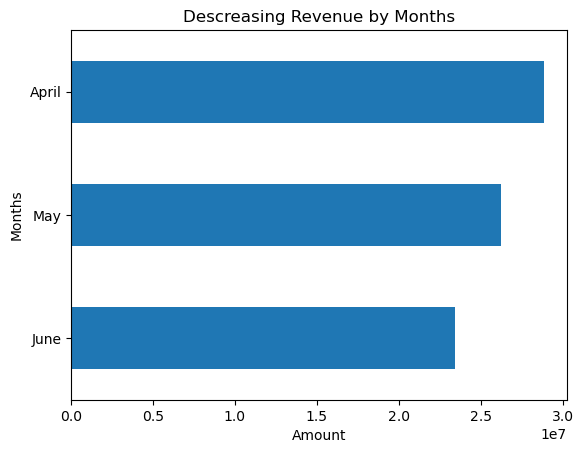

In [365]:
amazon.groupby('month')['Amount'].sum().sort_values(ascending=True).plot(kind = 'barh')
plt.title('Descreasing Revenue by Months')
plt.xlabel('Amount')
plt.ylabel('Months')
plt.show()

In [447]:
# Checking the percentage of orders which were shipped and cancelled by Amazon Users
orders_shipped = amazon[(amazon['Fulfilment'] == 'Amazon') & (amazon['Status'] == 'Shipped')]
order_cancelled = amazon[(amazon['Fulfilment'] == 'Amazon') & (amazon['Status'] == 'Cancelled')]
percent_orders_shipped = len(orders_shipped)/len(amazon[amazon['Fulfilment'] == 'Amazon']) * 100
percent_orders_cancelled = len(order_cancelled)/len(amazon[amazon['Fulfilment'] == 'Amazon']) * 100
print(f'The percentage of orders shipped is {percent_orders_shipped :.2f}%, which is very high as compared to {percent_orders_cancelled:.2f} percent of orders cancelled')

The percentage of orders shipped is 86.73%, which is very high as compared to 12.80 percent of orders cancelled


<Axes: ylabel='Status'>

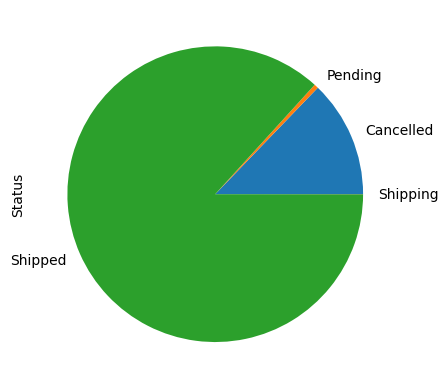

In [415]:
amazon[amazon['Fulfilment'] == 'Amazon'].groupby('Status')['Status'].count().plot(kind = 'pie')

In [290]:
amazon['ship-city'].fillna('unknown', inplace = True)
amazon['ship-state'].fillna('unknown', inplace = True)
amazon['ship-postal-code'].fillna('unknown', inplace = True)

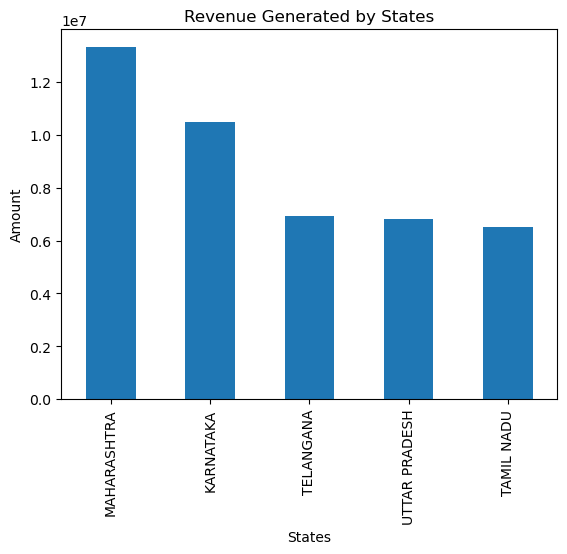

In [363]:
amazon.groupby('ship-state')['Amount'].sum().sort_values(ascending = False).head().plot(kind='bar')
plt.title('Revenue Generated by States')
plt.xlabel('States')
plt.ylabel('Amount')
plt.show()

<Axes: ylabel='Amount'>

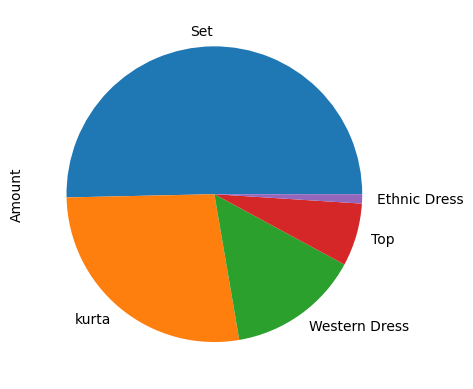

In [373]:
amazon.groupby('Product Category')['Amount'].sum().sort_values(ascending = False).head().plot(kind='pie')


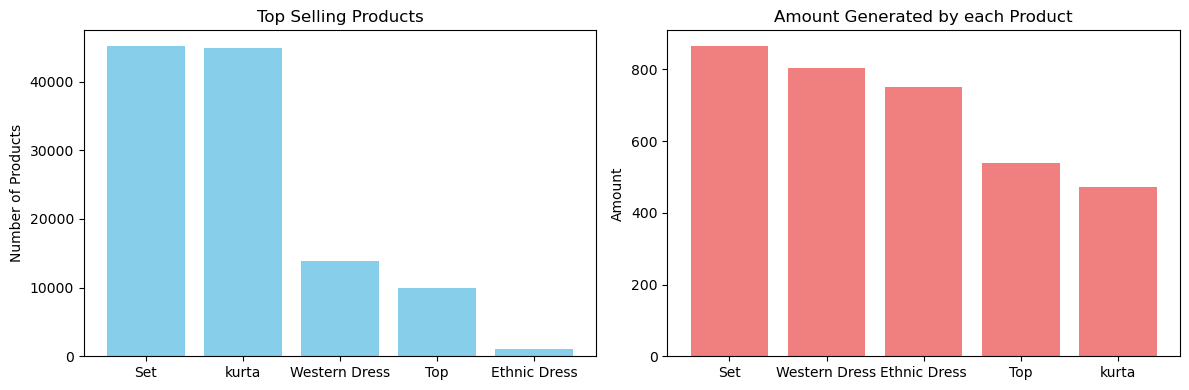

In [414]:
df1 = amazon.groupby('Product Category')['Qty'].sum().sort_values(ascending=False).head().to_frame()
no_of_products_sold = amazon.groupby('Product Category')['Qty'].sum().sort_values(ascending=False).head()
amount_generated_products = amazon.groupby('Product Category')['Amount'].sum().sort_values(ascending=False).head()
amount_generated_by_each_product = amount_generated_products / no_of_products_sold
df2 = amount_generated_by_each_product.reset_index().rename(columns={'Product Category': 'Category', 0: 'Amount'})

df2 = df2.sort_values(by='Amount', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.bar(df1.index, df1['Qty'], color='skyblue')
ax1.set_title('Top Selling Products')
ax1.set_ylabel('Number of Products') 

ax2.bar(df2['Category'], df2['Amount'], color='lightcoral')
ax2.set_title('Amount Generated by each Product')
ax2.set_ylabel('Amount')

plt.tight_layout()
plt.show()


In [418]:
amazon['B2B'] = amazon['B2B'].replace({True: 'Business', False: 'Individual'})


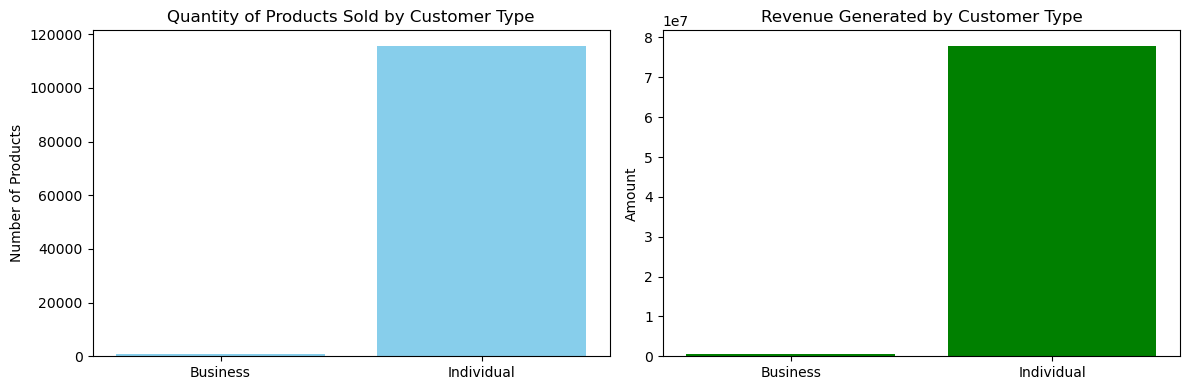

In [446]:
customer_type_for_products = amazon.groupby('B2B')['Qty'].sum().to_frame()
custome_type_for_revenue = amazon.groupby('B2B')['Amount'].sum().to_frame()

fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (12,4))
ax1.bar(customer_type_for_products.index, customer_type_for_products['Qty'], color ='skyblue')
ax1.set_title('Quantity of Products Sold by Customer Type')
ax1.set_ylabel('Number of Products')

ax2.bar(custome_type_for_revenue.index, custome_type_for_revenue['Amount'], color ='green')
ax2.set_title('Revenue Generated by Customer Type')
ax2.set_ylabel('Amount')

plt.tight_layout()
plt.show()

# Valueable Insights

In [448]:
# 19% of the total revenue has decreased in 2nd Quarter 
# The percentage of orders shipped is 86% which is good 
# Set and Kurta are highest selling products however Western Dress and Ethnic Dress generate good revenue despite of being low selling products
# Maharashtra is the state with highest revenue
# Most number of customers are Individuals generating incomparable revenue than Business customers